<a href="https://colab.research.google.com/github/STYLO009/machine_learning/blob/main/Fast_Food_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fastfood.csv')

In [3]:
df.head()

,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Company               1148 non-null   object
 1   Item                  1148 non-null   object
 2   Calories              1147 non-null   object
 3   Calories from
Fat     642 non-null    object
 4   Total Fat
(g)         1091 non-null   object
 5   Saturated Fat
(g)     1091 non-null   object
 6   Trans Fat
(g)         1091 non-null   object
 7   Cholesterol
(mg)      1147 non-null   object
 8   Sodium 
(mg)          1147 non-null   object
 9   Carbs
(g)             1091 non-null   object
 10  Fiber
(g)             1091 non-null   object
 11  Sugars
(g)            1147 non-null   object
 12  Protein
(g)           1091 non-null   object
 13  Weight Watchers
Pnts  887 non-null    object
dtypes: object(14)
memory usage: 125.7+ KB


,Company,Item,Calories,Calories from\nFat,Total Fat\n(g),Saturated Fat\n(g),Trans Fat\n(g),Cholesterol\n(mg),Sodium \n(mg),Carbs\n(g),Fiber\n(g),Sugars\n(g),Protein\n(g),Weight Watchers\nPnts
count,1148,1148,1147,642,1091,1091,1091,1147,1147,1091,1091,1147,1091,887
unique,6,1072,105,64,73,35,11,65,214,131,17,122,56,524
top,McDonald’s,29 fl oz,0,0,0,0,0,0,0,0,0,0,0,0
freq,329,11,83,175,357,383,954,378,54,75,551,190,314,67


In [5]:
df.shape

(1148, 14)

In [7]:
df.value_counts()

Company      Item                                  Calories  Calories from\nFat  Total Fat\n(g)  Saturated Fat\n(g)  Trans Fat\n(g)  Cholesterol\n(mg)  Sodium \n(mg)  Carbs\n(g)  Fiber\n(g)  Sugars\n(g)  Protein\n(g)  Weight Watchers\nPnts
Burger King  Hamburger                             240       90                  10              3.5                 0.5             35                 380            26          1           6            13            237                      2
             Chicken Nuggets- 6pc                  260       150                 16              2.5                 0               35                 470            16          1           0            12            251                      2
             Chicken Nuggets- 4pc                  170       100                 11              1.5                 0               25                 310            11          1           0            8             164                      2
             Cheeseburger                          280       120                 13              6                   0.5             45                 560            27          1           7            15            278                      2
             Soft Serve Cone                       190       40                  4.5             3                   0               20                 150            32          0           24           5             212                      2
                                                                                                                                                                                                                                                  ..
             Spicy Chicken Nuggets- 20 pc          1050      670                 74              15                  0               110                2840           56          9           1            40            1026                     1
             Spicy Chicken Nuggets- 10 pc          530       330                 37              7                   0               55                 1420           28          4           1            20            518                      1
             Soft Serve Cup                        170       40                  4.5             3                   0               20                 150            28          0           24           5             192                      1
             Smoothie: Strawberry Banana 16 fl oz  310       10                  1               0                   0               0                  55             71          3           50           4             356                      1
             Vanilla Milk Shake                    580       140                 15              10                  0               60                 420            98          0           85           14            661                      1
Name: count, Length: 508, dtype: int64

In [12]:
df.dtypes

,0
Company,object
Item,object
Calories,object
Calories from\nFat,object
Total Fat\n(g),object
Saturated Fat\n(g),object
Trans Fat\n(g),object
Cholesterol\n(mg),object
Sodium \n(mg),object
Carbs\n(g),object


In [19]:
df.rename(columns={
    'Calories from\nFat' : 'Calories from fat',
    'Total Fat\n(g)' : 'Totalfat',
    'Saturated Fat\n(g)' : 'saturatedfat',
    'Trans Fat\n(g)' : 'Transfat',
    'Cholesterol\n(mg)' : 'Cholestrol',
    'Sodium \n(mg)' : 'Sodium',
    'Carbs\n(g)' : 'carbs',
    'Fiber\n(g)' : 'Fiber',
    'Sugars\n(g)' : 'Sugar',
    'Protein\n(g)' : 'Protein',
    'Weight Watchers\nPnts' : 'Weight'
},inplace = True)

In [20]:
df

,Company,Item,Calories,Calories from fat,Totalfat,saturatedfat,Transfat,Cholestrol,Sodium,carbs,Fiber,Sugar,Protein,Weight
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1143,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Me...,230,NaN,10,4.5,0,25,390,25,2,1,11,NaN
1144,Pizza Hut,Hand Tossed Slices Ultimate Cheese Lover’s® Large,310,NaN,13,6,0,35,540,33,2,1,15,NaN
1145,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Small,120,NaN,4,1.5,0,10,230,17,1,1,5,NaN
1146,Pizza Hut,Hand Tossed Slices Veggie Lover’s® Medium,200,NaN,6,2.5,0,15,370,27,2,2,8,NaN


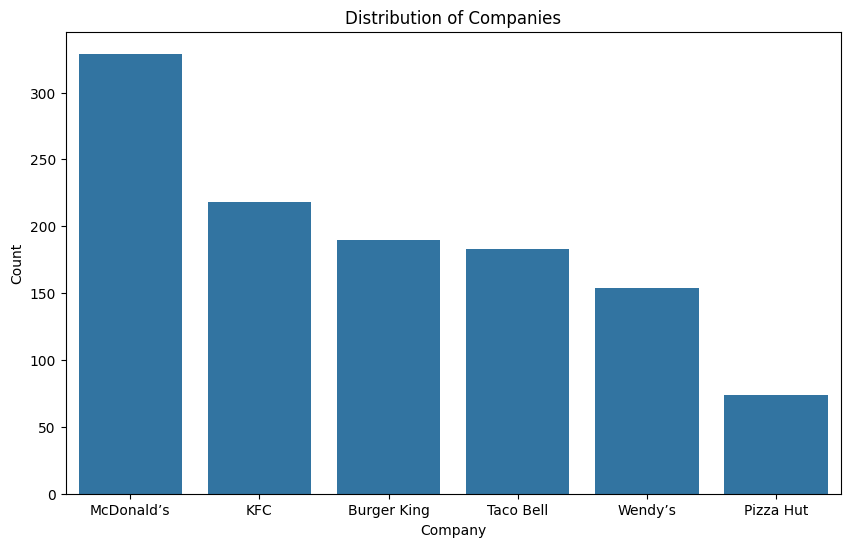

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(df, x = 'Company', order = df['Company'].value_counts().index)
plt.xlabel('Company')
plt.ylabel('Count')
plt.title('Distribution of Companies')
plt.show()

In [25]:
df.isnull().sum()

,0
Company,0
Item,0
Calories,1
Calories from fat,506
Totalfat,57
saturatedfat,57
Transfat,57
Cholestrol,1
Sodium,1
carbs,57


In [26]:
df.duplicated().sum()

np.int64(7)

In [29]:
df_cleaned = df.copy()
df_cleaned.shape

(1148, 14)

In [30]:
df_cleaned.drop_duplicates(inplace=True)

In [32]:
df_cleaned.shape

(1141, 14)

In [33]:
df_cleaned.dropna(inplace=True)

In [34]:
df_cleaned.shape

(508, 14)

In [35]:
df_cleaned

,Company,Item,Calories,Calories from fat,Totalfat,saturatedfat,Transfat,Cholestrol,Sodium,carbs,Fiber,Sugar,Protein,Weight
0,McDonald’s,Hamburger,250,80,9,3.5,0.5,25,520,31,2,6,12,247.5
1,McDonald’s,Cheeseburger,300,110,12,6,0.5,40,750,33,2,6,15,297
2,McDonald’s,Double Cheeseburger,440,210,23,11,1.5,80,1150,34,2,7,25,433
3,McDonald’s,McDouble,390,170,19,8,1,65,920,33,2,7,22,383
4,McDonald’s,Quarter Pounder® with Cheese,510,230,26,12,1.5,90,1190,40,3,9,29,502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,Burger King,BK® Café Mocha Frappe- 16 fl oz,400,90,10,7,0,40,270,68,1,58,9,456
515,Burger King,BK® Café Mocha Frappe- 20 fl oz,510,110,13,8,0,50,350,87,1,71,12,577
516,Burger King,BK® Café Caramel Frappe- 12 fl oz,300,80,8,5,0,35,210,50,0,41,7,339
517,Burger King,BK® Café Caramel Frappe- 16 fl oz,400,90,10,7,0,40,280,68,0,56,9,454


In [57]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Company','Item'],drop_first=True,dtype='int64')

In [59]:
df_encoded

,Calories,Calories from fat,Totalfat,saturatedfat,Transfat,Cholestrol,Sodium,carbs,Fiber,Sugar,...,Item_Vanilla Triple Thick® Shake (16 fl oz cup),Item_Vanilla Triple Thick® Shake (21 fl oz cup),Item_Whipped Margarine (1 pat),Item_Whopper JR.® Sandwich,Item_Whopper® Sandwich,Item_Whopper® Sandwich with Cheese,Item_Wild Berry Smoothie (Large),Item_Wild Berry Smoothie (Medium),Item_Wild Berry Smoothie (Small),Item_Zesty Onion Ring Dipping Sauce (1 oz)
0,250,80,9,3.5,0.5,25,520,31,2,6,...,0,0,0,0,0,0,0,0,0,0
1,300,110,12,6,0.5,40,750,33,2,6,...,0,0,0,0,0,0,0,0,0,0
2,440,210,23,11,1.5,80,1150,34,2,7,...,0,0,0,0,0,0,0,0,0,0
3,390,170,19,8,1,65,920,33,2,7,...,0,0,0,0,0,0,0,0,0,0
4,510,230,26,12,1.5,90,1190,40,3,9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,400,90,10,7,0,40,270,68,1,58,...,0,0,0,0,0,0,0,0,0,0
515,510,110,13,8,0,50,350,87,1,71,...,0,0,0,0,0,0,0,0,0,0
516,300,80,8,5,0,35,210,50,0,41,...,0,0,0,0,0,0,0,0,0,0
517,400,90,10,7,0,40,280,68,0,56,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df_encoded.value_counts()

Calories  Calories from fat  Totalfat  saturatedfat  Transfat  Cholestrol  Sodium  carbs  Fiber  Sugar  Protein  Weight  Company_McDonald’s  Item_1% Low Fat Chocolate Milk (8 fl oz)  Item_1% Low Fat Chocolate Milk Jug  Item_1% Low Fat Milk Jug  Item_16 fl oz  Item_20 fl oz  Item_29 fl oz  Item_38 fl oz  Item_40 fl oz  Item_American Cheese (slice)  Item_Angus Bacon & Cheese  Item_Angus Bacon & Cheese Snack Wrap  Item_Angus Chipotle BBQ Bacon  Item_Angus Chipotle BBQ Bacon Snack Wrap  Item_Angus Deluxe  Item_Angus Deluxe Snack Wrap  Item_Angus Mushroom & Swiss  Item_Angus Mushroom & Swiss Snack Wrap  Item_Apple Dippers with Low Fat Caramel Dip  Item_BBQ Bacon Crispy Chicken Sandwich  Item_BIG FISH Sandwich  Item_BK® Café Caramel Frappe- 12 fl oz  Item_BK® Café Caramel Frappe- 16 fl oz  Item_BK® Café Caramel Frappe- 20 fl oz  Item_BK® Café Coffee- 12 fl oz  Item_BK® Café Coffee- 16 fl oz  Item_BK® Café Coffee- 20 fl oz  Item_BK® Café Decaf Coffee- 12 fl oz  Item_BK® Café Decaf Coffee- 16 fl oz  Item_BK® Café Decaf Coffee- 20 fl oz  Item_BK® Café Iced Mocha Coffee- 12 fl oz  Item_BK® Café Iced Mocha Coffee- 16 fl oz  Item_BK® Café Iced Mocha Coffee- 20 fl oz  Item_BK® Café Iced Vanilla Coffee- 12 fl oz  Item_BK® Café Iced Vanilla Coffee- 16 fl oz  Item_BK® Café Iced Vanilla Coffee- 20 fl oz  Item_BK® Café Mocha Frappe- 12 fl oz  Item_BK® Café Mocha Frappe- 16 fl oz  Item_BK® Café Mocha Frappe- 20 fl oz  Item_BK™ Ultimate Breakfast Platter  Item_Bacon & Cheese Crispy Chicken Sandwich  Item_Bacon & Cheese Whopper® Sandwich  Item_Bacon Cheeseburger  Item_Bacon Double Cheeseburger  Item_Bacon King Sandwich  Item_Bacon, Egg & Cheese Bagel  Item_Bacon, Egg & Cheese Biscuit  Item_Bacon, Egg & Cheese Biscuit (Large Size Biscuit)  Item_Bacon, Egg & Cheese Biscuit (Regular Size Biscuit)  Item_Bacon, Egg & Cheese McGriddles®  Item_Baked Hot Apple Pie  Item_Barbecue Dipping Sauce (1 oz)  Item_Barbeque Sauce  Item_Barq’s® Root Beer‡  Item_Big Breakfast with Hotcakes (Large Size Biscuit)  Item_Big Breakfast with Hotcakes (Regular Size Biscuit)  Item_Big Breakfast® (Large Size Biscuit)  Item_Big Breakfast® (Regular Size Biscuit)  Item_Big Mac®  Item_Big N’ Tasty®  Item_Big N’ Tasty® with Cheese  Item_Breakfast Burrito Jr.  Item_Breakfast Syrup (1 oz)  Item_Buffalo Dipping Sauce (1 oz)  Item_Butter Garlic Croutons  Item_Buttery Garlic Croutons- Packet  Item_CROISSAN’WICH® Bacon, Egg & Cheese  Item_CROISSAN’WICH® Egg & Cheese  Item_CROISSAN’WICH® Ham, Egg & Cheese  Item_CROISSAN’WICH® Sausage, Egg & Cheese  Item_Cappuccino (Large)  Item_Cappuccino (Medium)  Item_Cappuccino (Small)  Item_Cappuccino with Sugar Free Vanilla Syrup (Large)  Item_Cappuccino with Sugar Free Vanilla Syrup (Medium)  Item_Cappuccino with Sugar Free Vanilla Syrup (Small)  Item_Capri Sun® 100% Apple Juice  Item_Capri Sun® 100% Apple Juice (6 fl oz)  Item_Caramel Cappuccino (Large)  Item_Caramel Cappuccino (Medium)  Item_Caramel Cappuccino (Small)  Item_Caramel Latte (Large)  Item_Caramel Latte (Medium)  Item_Caramel Latte (Small)  Item_Caramel Mocha (Large)  Item_Caramel Mocha (Medium)  Item_Caramel Mocha (Small)  Item_Caramel Sundae  Item_Cheddar Bacon King Sandwich  Item_Cheeseburger  Item_Cherry Coke®‡  Item_Chicken Fries – 9 pc.  Item_Chicken McNuggets® (10 piece)  Item_Chicken McNuggets® (4 piece)  Item_Chicken McNuggets® (6 piece)  Item_Chicken Nuggets- 10pc  Item_Chicken Nuggets- 20pc  Item_Chicken Nuggets- 4pc  Item_Chicken Nuggets- 6pc  Item_Chicken Selects® Premium Breast Strips (3 pc)  Item_Chicken Selects® Premium Breast Strips (5 pc)  Item_Chipotle BBQ Snack Wrap® (Crispy)  Item_Chipotle BBQ Snack Wrap® (Grilled)  Item_Chocolate Chip Cookie  Item_Chocolate Chip Cookies (each)  Item_Chocolate McCafé® Shake (12 fl oz cup)  Item_Chocolate McCafé® Shake (16 fl oz cup)  Item_Chocolate McCafé® Shake (22 fl oz cup)  Item_Chocolate Oreo® Shake  Item_Chocolate Triple Thick® Shake (12 fl oz cup)  Item_Chocolate Triple Thick® Shake (16 fl oz cup)  Item_Chocolate Triple Thic

In [66]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Replace the non-breaking space character '\xa0' with an empty string in all columns
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = df_encoded[col].astype(str).str.replace('\xa0', '', regex=False)


# Convert potential numeric columns to numeric, coercing errors
for col in ['Calories', 'Calories from fat', 'Totalfat', 'saturatedfat', 'Transfat', 'Cholestrol', 'Sodium', 'carbs', 'Fiber', 'Sugar', 'Protein', 'Weight']:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')


scale = StandardScaler()

df_encoded_scale = scale.fit_transform(df_encoded)

In [67]:
df_encoded_scale

array([[-0.2542515 , -0.22851293, -0.22324625, ..., -0.04441156,
        -0.04441156, -0.04441156],
       [-0.04821368, -0.00516794, -0.02242564, ..., -0.04441156,
        -0.04441156, -0.04441156],
       [ 0.52869221,  0.73931536,  0.71391659, ..., -0.04441156,
        -0.04441156, -0.04441156],
       ...,
       [-0.04821368, -0.22851293, -0.29018645, ..., -0.04441156,
        -0.04441156, -0.04441156],
       [ 0.36386196, -0.1540646 , -0.15630605, ..., -0.04441156,
        -0.04441156, -0.04441156],
       [ 0.77593759, -0.00516794, -0.02242564, ..., -0.04441156,
        -0.04441156, -0.04441156]])

In [68]:
final = df_encoded.copy()

In [81]:
column_names = list(final.columns)
print(column_names)
# Drop rows where the target variable 'Weight' is missing
final.dropna(subset=['Weight'], inplace=True)

X = final.drop('Weight', axis=1)
y = final['Weight']

['Calories', 'Calories from fat', 'Totalfat', 'saturatedfat', 'Transfat', 'Cholestrol', 'Sodium', 'carbs', 'Fiber', 'Sugar', 'Protein', 'Weight', 'Company_McDonald’s', 'Item_1% Low Fat Chocolate Milk (8 fl oz)', 'Item_1% Low Fat Chocolate Milk Jug', 'Item_1% Low Fat Milk Jug', 'Item_16 fl oz', 'Item_20 fl oz', 'Item_29 fl oz', 'Item_38 fl oz', 'Item_40 fl oz', 'Item_American Cheese (slice)', 'Item_Angus Bacon & Cheese', 'Item_Angus Bacon & Cheese Snack Wrap', 'Item_Angus Chipotle BBQ Bacon', 'Item_Angus Chipotle BBQ Bacon Snack Wrap', 'Item_Angus Deluxe', 'Item_Angus Deluxe Snack Wrap', 'Item_Angus Mushroom & Swiss', 'Item_Angus Mushroom & Swiss Snack Wrap', 'Item_Apple Dippers with Low Fat Caramel Dip', 'Item_BBQ Bacon Crispy Chicken Sandwich', 'Item_BIG FISH Sandwich', 'Item_BK® Café Caramel Frappe- 12 fl oz', 'Item_BK® Café Caramel Frappe- 16 fl oz', 'Item_BK® Café Caramel Frappe- 20 fl oz', 'Item_BK® Café Coffee- 12 fl oz', 'Item_BK® Café Coffee- 16 fl oz', 'Item_BK® Café Coffee- 2

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [83]:
final.dropna(inplace=True)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Impute missing values in X_train
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_imputed,y_train)

LinearRegression()

In [85]:
y_pred = model.predict(X_test)
y_pred

array([ 9.48303009e+01,  7.93046122e+02,  3.02837463e+02,  6.10758228e+02,
        2.68042655e+02,  2.28373105e+02,  5.29651213e+02,  1.64571443e+02,
        4.06824011e+02,  7.30489543e+01,  2.64584404e+02,  8.40853940e+02,
        2.67342932e+02,  6.51995357e+02,  2.26578150e+02,  7.12356261e+00,
        1.95216018e+01,  2.84841129e-01,  3.51536038e+02,  1.69867374e+02,
        2.50495029e-01,  2.53149724e+02,  3.68919206e+02,  2.89988320e+02,
        2.90092738e+02,  7.94209291e+02,  7.82441871e+02,  2.79613844e+02,
        2.31532880e+02,  1.72232946e+02,  8.31377129e+01,  5.19086480e+02,
        2.06154790e+02,  3.77271961e+02,  3.74310723e+02,  1.85175659e+02,
        9.91680701e+02,  1.48385362e+01,  5.28352246e+02,  3.36966325e+02,
        5.18481723e+02,  2.64560890e+02,  3.78073086e+00,  3.80519313e+02,
        2.03807916e+02,  3.56214128e+02,  6.15231318e+02,  2.06518848e+02,
        2.55978137e+02,  8.56852823e+01,  1.60326158e+02,  4.47019375e+01,
        1.90456452e+02,  

In [86]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.9964469989502182

In [87]:
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
adjusted_r2

1.0009256502734958